In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:05<00:00, 38.7MB/s]
100% 163M/163M [00:05<00:00, 32.0MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print(('Data extracted'))

Data extracted


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1732.jpg', 'with_mask_344.jpg', 'with_mask_2096.jpg', 'with_mask_2133.jpg', 'with_mask_3659.jpg']
['with_mask_3200.jpg', 'with_mask_2888.jpg', 'with_mask_139.jpg', 'with_mask_1236.jpg', 'with_mask_2746.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1635.jpg', 'without_mask_2759.jpg', 'without_mask_3815.jpg', 'without_mask_38.jpg', 'without_mask_3364.jpg']
['without_mask_1058.jpg', 'without_mask_3789.jpg', 'without_mask_1308.jpg', 'without_mask_3703.jpg', 'without_mask_2156.jpg']


In [10]:
print('Number of images with mask: ', len(with_mask_files))
print('Number of images with mask: ', len(without_mask_files))

Number of images with mask:  3725
Number of images with mask:  3828


In [11]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_labels + without_mask_labels

In [14]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


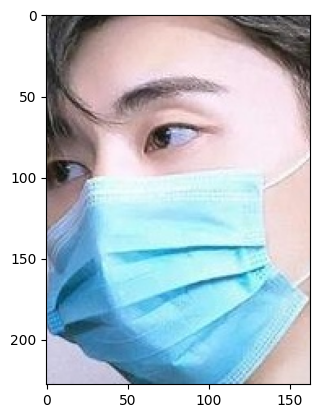

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

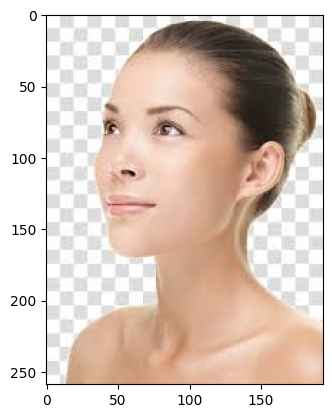

In [16]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

# New Section

In [17]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []

In [18]:
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [20]:
type(data)


list

In [21]:
len(data)

7553

In [22]:
type(data[0])


numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
X_train_scaled = X_train/255
Y_train_scaled = Y_train/255
X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
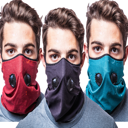

In [31]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
model = keras.Sequential()

In [35]:
num_of_classes = 2

In [36]:
model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2 ,2)))

model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2 ,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['acc'])

In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 155s 897ms/step - acc: 0.7270 - loss: 0.6518 - val_acc: 0.8744 - val_loss: 0.2992
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 897ms/step - acc: 0.8924 - loss: 0.2843 - val_acc: 0.8744 - val_loss: 0.3353
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 204s 911ms/step - acc: 0.9104 - loss: 0.2301 - val_acc: 0.8909 - val_loss: 0.2389
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 868ms/step - acc: 0.9288 - loss: 0.1897 - val_acc: 0.9223 - val_loss: 0.2096
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 148s 872ms/step - acc: 0.9478 - loss: 0.1399 - val_acc: 0.9107 - val_loss: 0.2353


In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accurracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - acc: 0.9196 - loss: 0.2201
Test Accurracy =  0.9225678443908691


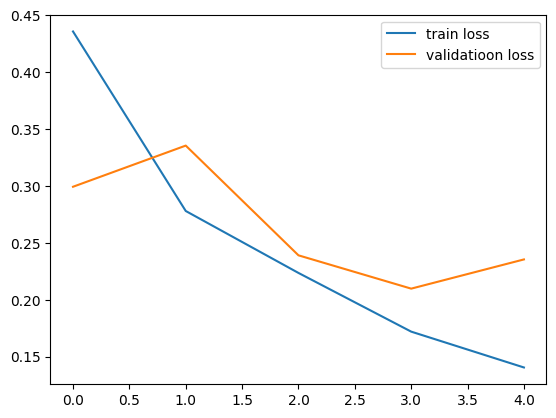

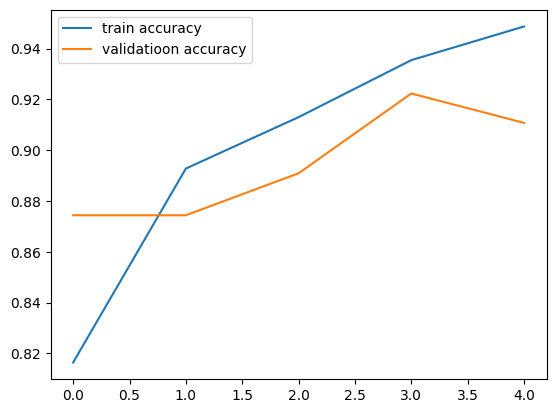

In [40]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validatioon loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validatioon accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/download.png


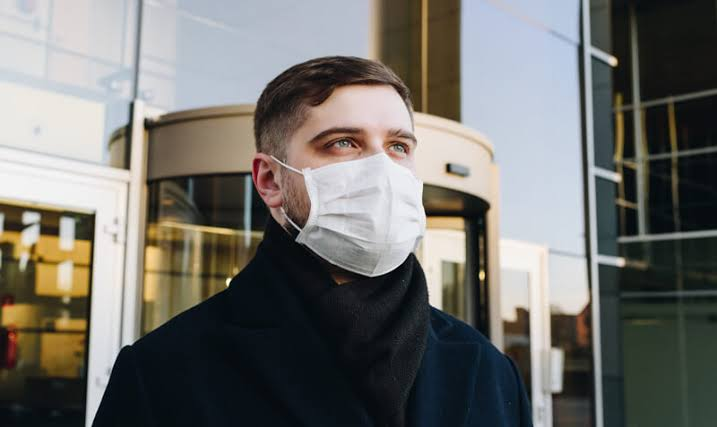

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
[[0.15412508 0.6619278 ]]
1
The person in the image is wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
